In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("player_features_train_20250528.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.drop(columns=[ 'dayofweek', 'venue', 'result', 'team', 'opponent',
        'minutes', 'goals', 'assists', 'pens_made',
       'pens_att', 'shots', 'shots_on_target', 'cards_yellow', 'cards_red',
       'touches', 'tackles', 'interceptions', 'blocks', 'xg', 'npxg',
       'xg_assist', 'sca', 'gca', 'passes_completed', 'passes_pct',
       'progressive_passes', 'carries', 'progressive_carries', 'take_ons',
       'take_ons_won', 'player_id', 'stat_type', 'season',
        'match_id', 'player_match_id',
       'season_start_year', 'is_transfer_season', 'team_strength',
        'team_offensive_strength','team_elo', 'opponent_elo',
       'strength_diff', 'season_year',
       'next_game_team',
       'next_game_opponent', 'next_game_minutes'], inplace=True)

In [6]:
df.columns

Index(['date', 'round', 'game_started', 'position', 'passes', 'player_name',
       'league', 'is_post_transfer_match', 'opponent_strength',
       'opponent_defensive_strength', 'team_offensive_strength_last_3',
       'opponent_defensive_strength_last_3', 'team_offensive_strength_last_5',
       'opponent_defensive_strength_last_5', 'is_home_next_game',
       'target_scored_next_game', 'next_game_date', 'strength_diff_next_game',
       'team_offensive_strength_next_game', 'team_strength_next_game',
       'team_elo_next_game', 'team_offensive_strength_last_3_next_game',
       'team_offensive_strength_last_5_next_game',
       'opponent_defensive_strength_next_game', 'opponent_strength_next_game',
       'opponent_elo_next_game',
       'opponent_defensive_strength_last_3_next_game',
       'opponent_defensive_strength_last_5_next_game',
       'offensive_defensive_multiply_next_game',
       'offensive_defensive_multiply_last_3_next_game',
       'offensive_defensive_multiply_last

In [3]:
df = df.dropna()
df.head(10) 
df.to_csv("player_features_20250409_cleaned.csv", index=False)


In [4]:
df_test = pd.read_csv("player_features_test_20250528.csv")
print(len(df_test))

17257


In [5]:

df_test.rename(columns={"is_post_transfer": "is_post_transfer_match"}, inplace=True)
df_test = df_test[df.columns]
df_test = df_test.dropna()
print(len(df_test[df_test['is_post_transfer_match'] == True]))


7361


### eda

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------
# 1. Lecture du DataFrame
# ------------------------------------------------------------------------
# Remplacez le chemin si nécessaire
df = pd.read_csv("player_features_20250409_cleaned.csv")

# ------------------------------------------------------------------------
# 2. Exploration initiale
# ------------------------------------------------------------------------
# Dimensions du DataFrame
print("Dimensions du DataFrame : ", df.shape)

# Aperçu des premières lignes
print("\nAperçu du DataFrame :")
print(df.head())

# Types de données et informations générales
print("\nInformations sur le DataFrame :")
df.info()

# Statistiques descriptives de base pour les variables numériques
print("\nStatistiques descriptives (variables numériques) :")
print(df.describe())

# Regardons aussi les colonnes "object"/"category" (catégorielles)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
if len(categorical_cols) > 0:
    print("\nColonnes catégorielles (aperçu des modalités) :")
    for col in categorical_cols:
        print(f"\nColonne : {col}")
        print(df[col].value_counts(dropna=False))



Dimensions du DataFrame :  (108731, 45)

Aperçu du DataFrame :
         date         round game_started position   player_name  league  \
0  2022-02-26  Matchweek 27            Y       LM  Aaron Hickey  SerieA   
1  2021-10-02   Matchweek 7            Y       RM  Aaron Lennon     EPL   
2  2021-12-01  Matchweek 14            N       RM  Aaron Lennon     EPL   
3  2021-12-12  Matchweek 16            N       LM  Aaron Lennon     EPL   
4  2021-12-30  Matchweek 20            Y       FW  Aaron Lennon     EPL   

   is_post_transfer_match  is_home_next_game  target_scored_next_game  \
0                   False                0.0                        0   
1                   False                0.0                        0   
2                   False                1.0                        0   
3                   False                0.0                        1   
4                   False                0.0                        0   

  next_game_date  strength_diff_next_game  team


Répartition de la variable cible 'target_scored_next_game':
target_scored_next_game
0    95709
1    13022
Name: count, dtype: int64


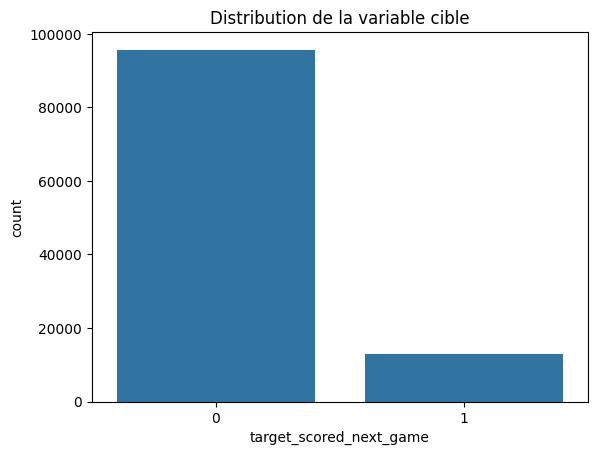

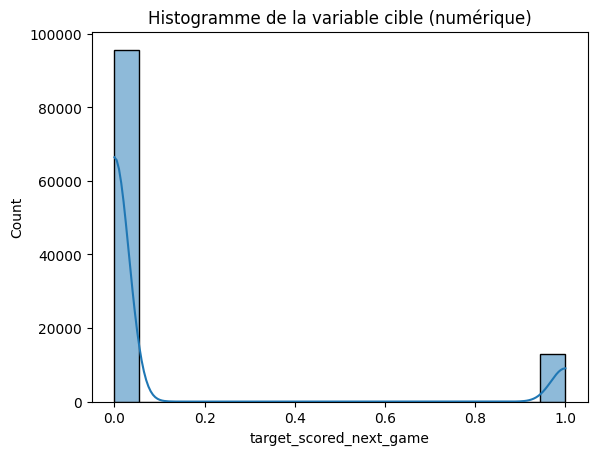

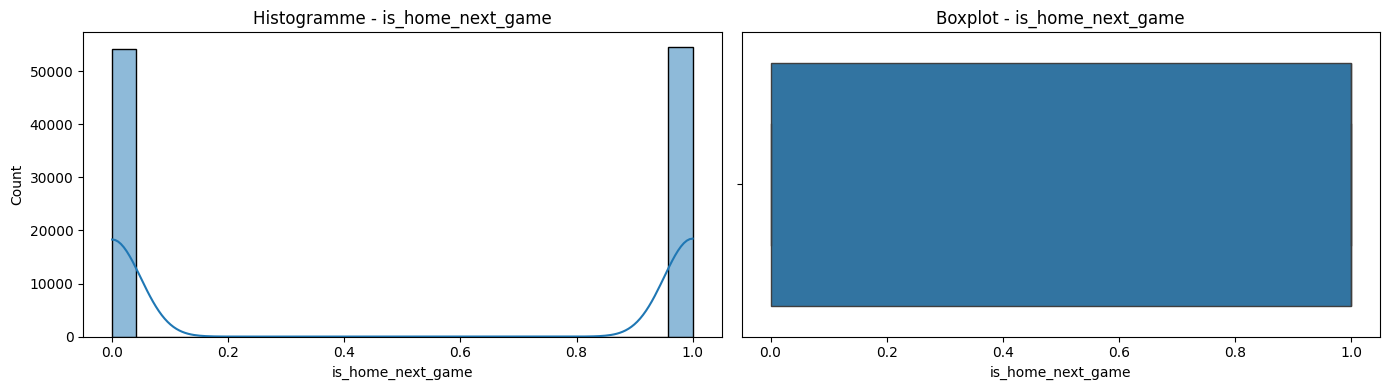

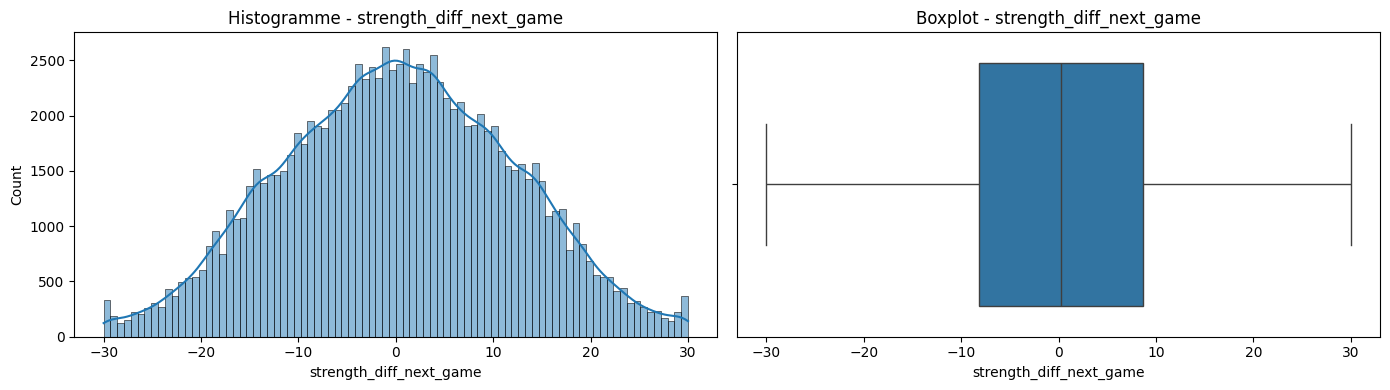

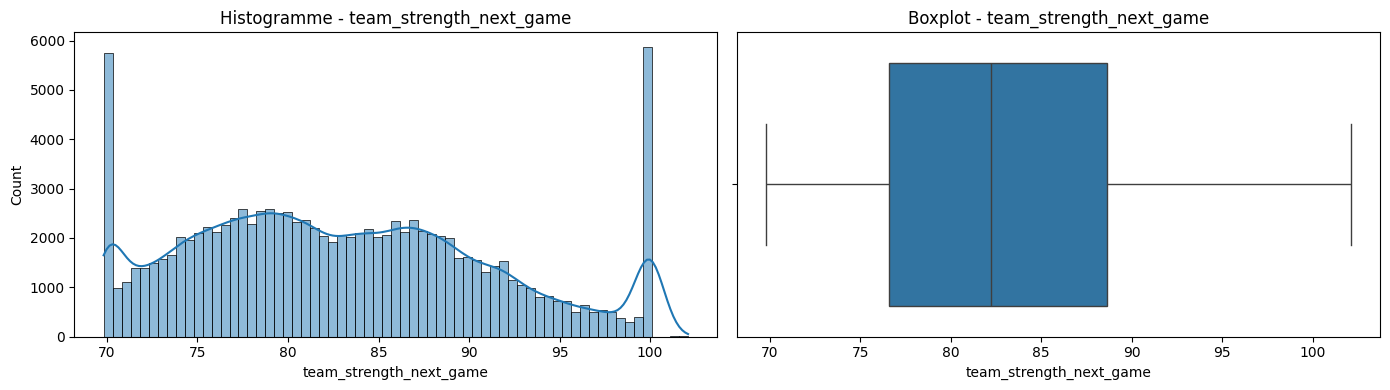

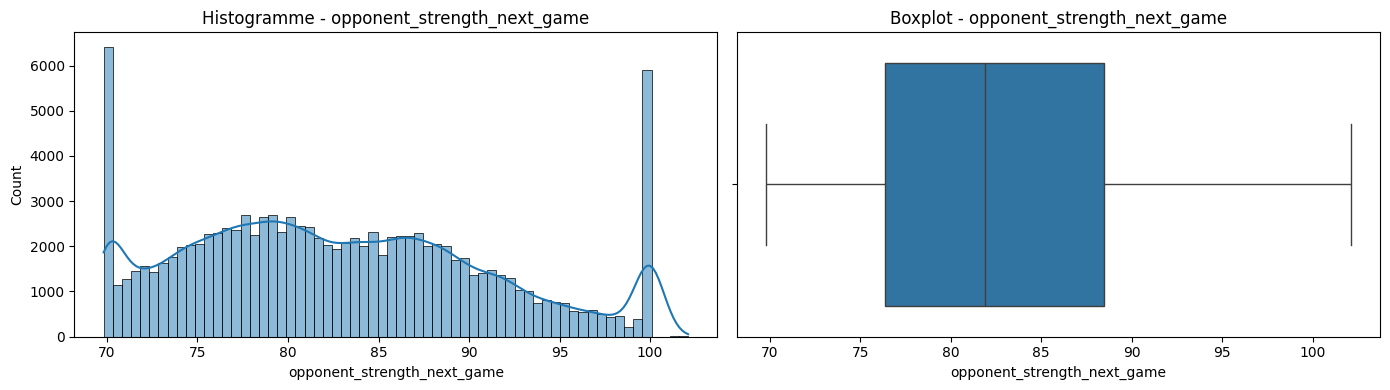

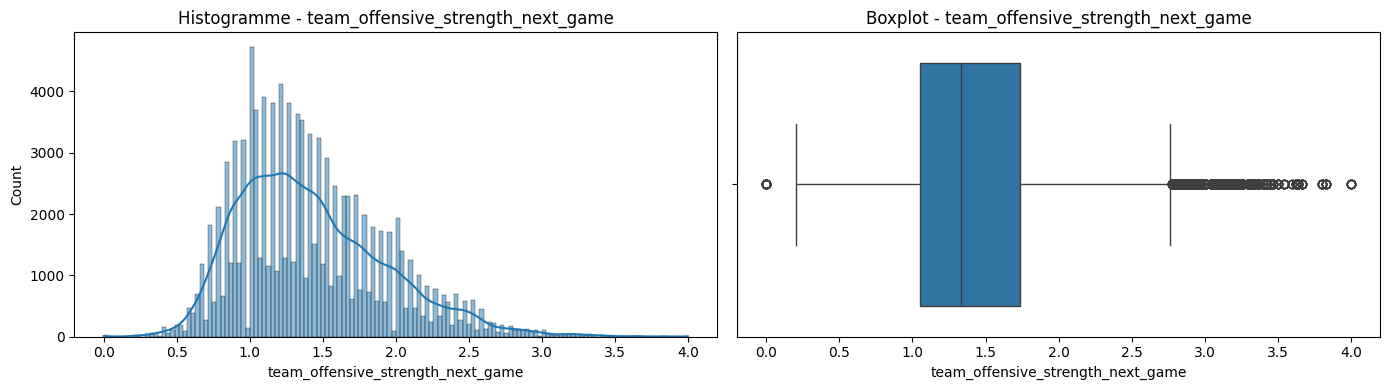

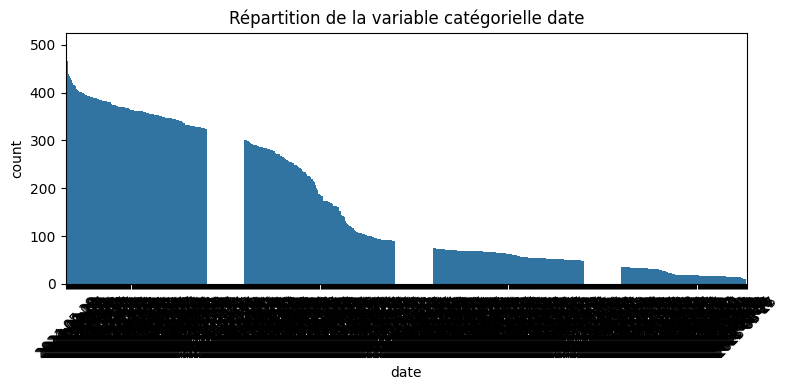

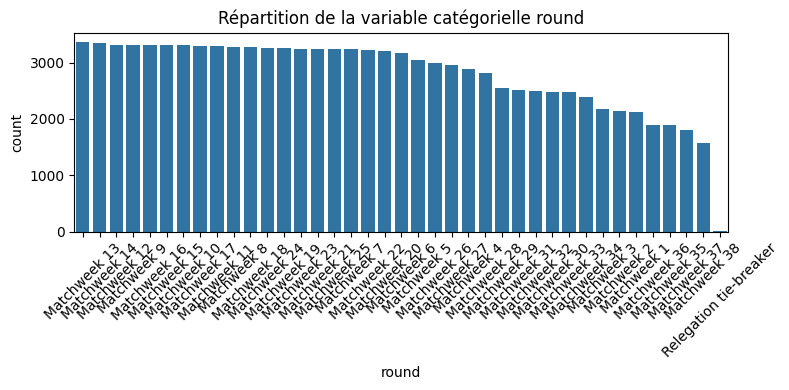

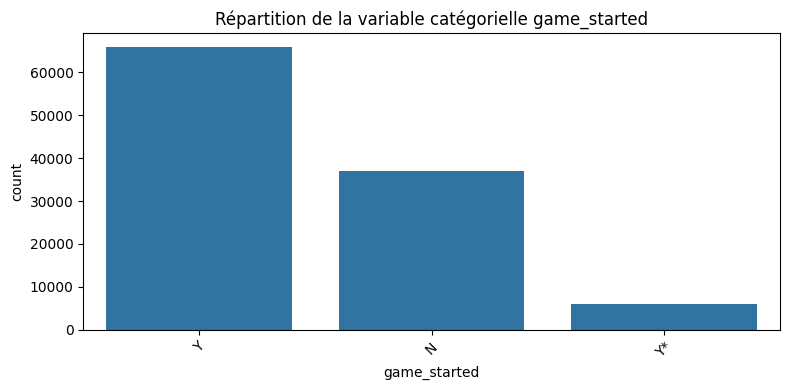

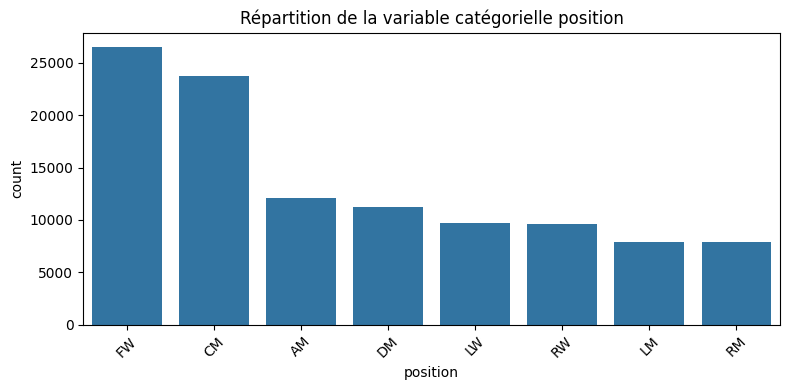

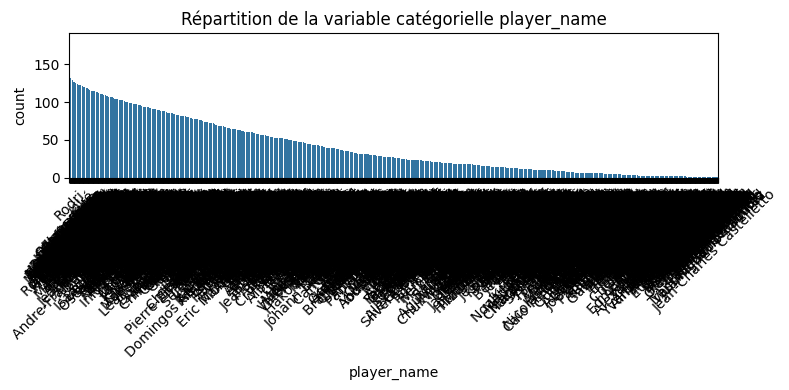

In [19]:

# ------------------------------------------------------------------------
# 4. Distribution de la variable cible
# ------------------------------------------------------------------------
# Supposons que la variable cible s'appelle "target_score_next_game"
target_col = "target_scored_next_game"
if target_col in df.columns:
    print(f"\nRépartition de la variable cible '{target_col}':")
    print(df[target_col].value_counts(dropna=False))

    # Distribution de la variable cible
    plt.figure()
    sns.countplot(data=df, x=target_col)
    plt.title("Distribution de la variable cible")
    plt.show()

    if df[target_col].dtype in [np.float64, np.int64]:
        plt.figure()
        sns.histplot(data=df, x=target_col, kde=True)
        plt.title("Histogramme de la variable cible (numérique)")
        plt.show()

# ------------------------------------------------------------------------
# 5. Distribution des variables numériques
# ------------------------------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols[:10]:
    numeric_cols.remove(target_col) 

# Exemple de distribution pour chaque variable numérique (histogrammes + boxplots)
for col in numeric_cols[:5]:
    plt.figure(figsize=(14, 4))

    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Histogramme - {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------
# 6. Distribution des variables catégorielles
# ------------------------------------------------------------------------
for col in categorical_cols[:5]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Répartition de la variable catégorielle {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


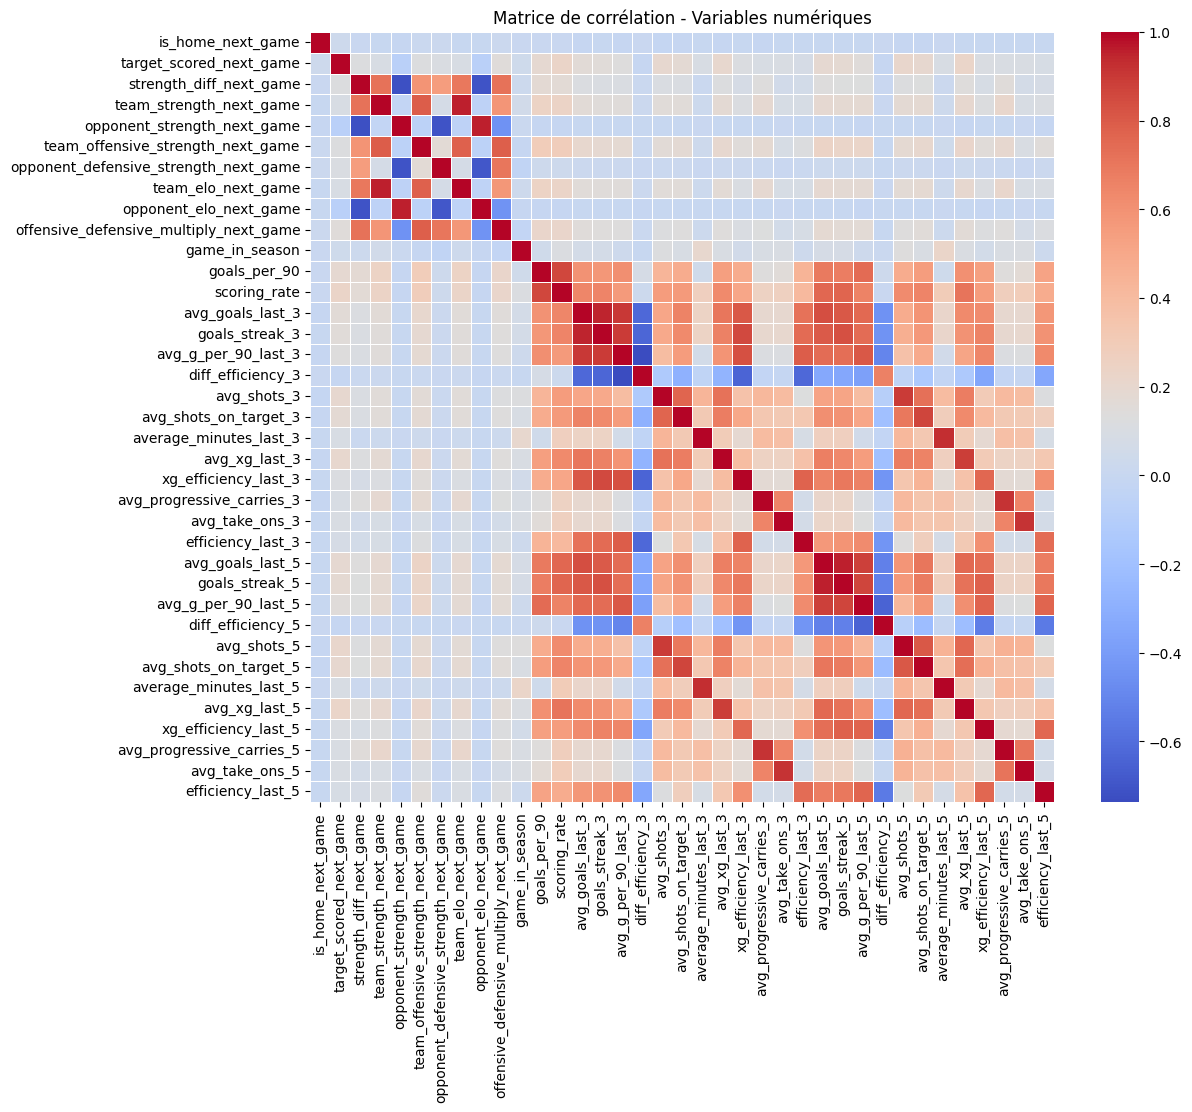


Corrélation de chaque variable numérique avec la cible 'target_scored_next_game' :
target_scored_next_game                   1.000000
scoring_rate                              0.228574
avg_xg_last_5                             0.222748
avg_shots_5                               0.212077
avg_xg_last_3                             0.202405
avg_shots_on_target_5                     0.199656
avg_shots_3                               0.194353
avg_goals_last_5                          0.190081
goals_per_90                              0.189644
goals_streak_5                            0.183149
avg_shots_on_target_3                     0.177041
avg_goals_last_3                          0.164563
goals_streak_3                            0.158610
offensive_defensive_multiply_next_game    0.150278
avg_g_per_90_last_5                       0.149919
avg_g_per_90_last_3                       0.132687
team_offensive_strength_next_game         0.121852
strength_diff_next_game                   0.12035

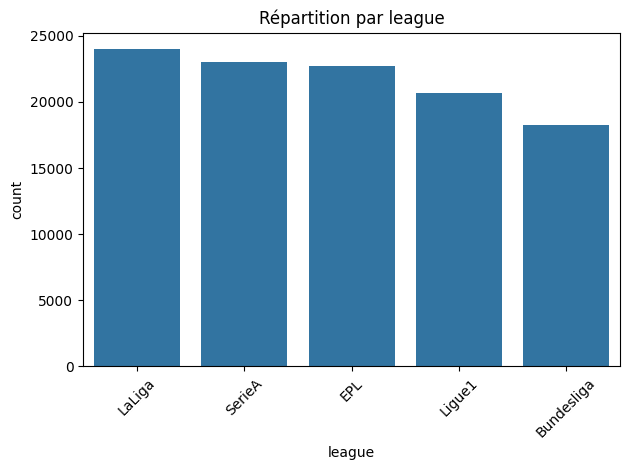


Moyenne de la cible 'target_scored_next_game' par league :
league
EPL           0.130895
Bundesliga    0.130404
Ligue1        0.119969
SerieA        0.113928
LaLiga        0.106547
Name: target_scored_next_game, dtype: float64


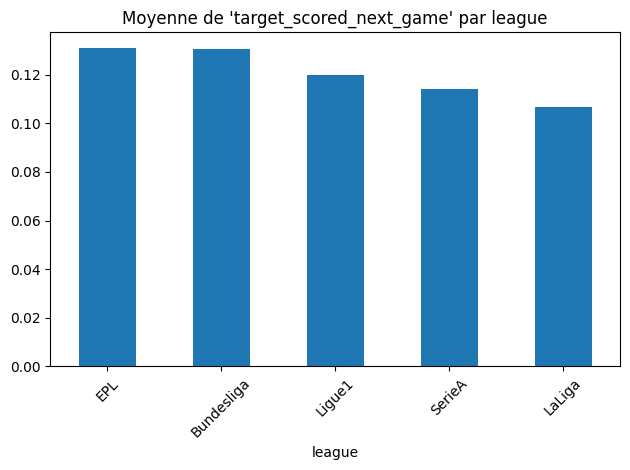

In [20]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation - Variables numériques")
plt.show()

# ------------------------------------------------------------------------
# 8. Corrélation avec la variable cible
# ------------------------------------------------------------------------

if df[target_col].dtype in [np.float64, np.int64]:
    # Corrélation numérique
    target_correlations = corr_matrix[target_col].sort_values(ascending=False)
    print(f"\nCorrélation de chaque variable numérique avec la cible '{target_col}' :")
    print(target_correlations)
else:

    if df[target_col].nunique() == 2:
        print("\nLa cible semble binaire. On peut calculer la moyenne de chaque variable numérique par classe de la cible.")
        for col in numeric_cols:
            group_mean = df.groupby(target_col)[col].mean()
            print(f"{col}:")
            print(group_mean)
            print("---")

# ------------------------------------------------------------------------
# 9. Analyse par championnat (ou autre segmentation pertinente)
# ------------------------------------------------------------------------

segment_col = "league"                                   # Ajustez selon vos colonnes
if segment_col in df.columns:
    print(f"\nAnalyse par championnat : {segment_col}")

    # Distribution du nombre de joueurs/matchs par championnat
    plt.figure()
    sns.countplot(data=df, x=segment_col, order=df[segment_col].value_counts().index)
    plt.title(f"Répartition par {segment_col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # On peut aussi regarder la moyenne du target_score_next_game par championnat
    if df[target_col].dtype in [np.float64, np.int64]:
    
        mean_by_champ = df.groupby(segment_col)[target_col].mean().sort_values(ascending=False)
        print(f"\nMoyenne de la cible '{target_col}' par {segment_col} :")
        print(mean_by_champ)
        
        plt.figure()
        mean_by_champ.plot(kind='bar')
        plt.title(f"Moyenne de '{target_col}' par {segment_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif df[target_col].nunique() == 2:
      
        rate_by_champ = df.groupby(segment_col)[target_col].mean().sort_values(ascending=False)
        print(f"\nTaux de 1 de la cible '{target_col}' par {segment_col} :")
        print(rate_by_champ)
        
        plt.figure()
        rate_by_champ.plot(kind='bar')
        plt.title(f"Taux de 1 de la cible '{target_col}' par {segment_col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# ------------------------------------------------------------------------
# 10. Relations bivariées supplémentaires (exemples)
# ------------------------------------------------------------------------

# if len(numeric_cols) > 1:
#     col_x = numeric_cols[0]
#     col_y = numeric_cols[1]
#     plt.figure()
#     sns.scatterplot(data=df, x=col_x, y=col_y, hue=target_col if df[target_col].nunique() < 10 else None)
#     plt.title(f"Relation entre {col_x} et {col_y} (hue={target_col})")
#     plt.show()

### suite eda

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# On réduit la taille pour l'affichage
df_sample = df.sample(10000, random_state=42)

# Détection des variables numériques
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Statistiques descriptives
desc_stats = df[numeric_cols].describe()

# Corrélations avec la variable cible
target_corr = df[numeric_cols].corr()['target_scored_next_game'].sort_values(ascending=False)


# Affichage des résultats dans l'interface
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Random DataFrame", dataframe=df)

# On retourne aussi la liste des plus fortes corrélations avec la cible
target_corr.head(10), target_corr.tail(10)


 Les variables liées au volume de jeu collectif, au niveau de l’adversaire, ou au profil défensif sont négativement liées aux chances de marquer.



On voit clairement que les xG, tirs récents, buts récents sont de bons indicateurs d’un futur but.

In [ ]:
# Préparer un sous-échantillon pour les visualisations
df_viz = df.sample(10000, random_state=1)

# 1. Heatmap des corrélations des 15 variables les plus corrélées avec la cible
top_corr_vars = target_corr.abs().sort_values(ascending=False).head(15).index.tolist()
corr_matrix = df_viz[top_corr_vars].corr()

# Tracer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔍 Corrélation entre les variables les plus liées à 'target_scored_next_game'")
plt.tight_layout()
plt.show()


On observe un noyau très cohérent autour des performances offensives récentes :

avg_xg_last_5, scoring_rate, avg_goals_last_5, goals_per_90, etc. sont toutes positivement corrélées entre elles et avec la cible.

Ces variables capturent des dynamiques récentes de forme et d’efficacité offensive.

In [ ]:
# Choix des variables les plus pertinentes pour l'analyse visuelle
top_features = [
    "avg_xg_last_5", "goals_per_90", "scoring_rate", 
    "avg_shots_5", "avg_xg_last_3", "avg_shots_on_target_5"
]

# Histogrammes et boxplots selon la variable cible
for col in top_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogramme
    sns.histplot(data=df_viz, x=col, hue="target_scored_next_game", kde=True, ax=axes[0], element="step", stat="density")
    axes[0].set_title(f"Distribution de {col} selon la cible")
    
    # Boxplot
    sns.boxplot(data=df_viz, x="target_scored_next_game", y=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col} selon la cible")

    plt.tight_layout()
    plt.show()


avg_xg_last_5 (xG moyen sur 5 matchs) :
Distribution clairement décalée vers la droite chez les joueurs qui marquent ensuite.

Plus le joueur a généré de xG récemment, plus il est probable qu’il marque.

goals_per_90 :
Les buteurs réguliers (haut G/90) ont une probabilité accrue de continuer à marquer.

scoring_rate :
Ce ratio (buts / tirs) est un bon indicateur d’efficacité. Les joueurs efficaces marquent plus souvent ensuite.

avg_shots_5 :
Les joueurs qui tentent beaucoup leur chance sont logiquement ceux qui ont plus de chances de marquer.

avg_xg_last_3 et avg_shots_on_target_5 :
Même tendance : la forme récente offensive (xG ou tirs cadrés) est fortement prédictive.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Préparer les données
features = top_corr_vars[1:]  # Exclure la target elle-même
X = df[features]
y = df['target_scored_next_game']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner une Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Importance des variables
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("🎯 Importance des variables dans la prédiction d'un but au prochain match")
plt.xlabel("Importance (Random Forest)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# On garde les 6 variables les plus importantes
selected_features = importances.head(6).index.tolist()
X_selected = df[selected_features]

# Régression logistique
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_selected, y)

# Coefficients du modèle
coeffs = pd.Series(log_model.coef_[0], index=selected_features)
intercept = log_model.intercept_[0]

# Construction de la formule en LaTeX
formula = f"P(goal_next_game) = 1 / (1 + exp(-({intercept:.3f}"
for var, coef in coeffs.items():
    formula += f" + {coef:.3f}*{var}"
formula += ")))"

formula


In [ ]:
# Liste des ligues disponibles
ligues = df['league'].value_counts()

# Calcul des statistiques moyennes par ligue
league_stats = df.groupby('league')[
    [
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5", 
        "avg_shots_on_target_5", "avg_goals_last_5", "xg_efficiency_last_5"
    ]
].mean().sort_values(by="goals_per_90", ascending=False)

# Affichage des stats par ligue
tools.display_dataframe_to_user(name="Comparaison des championnats (moyennes)", dataframe=league_stats)

# Préparation pour les graphiques
melted = df[df['league'].isin(league_stats.index)].melt(
    id_vars="league",
    value_vars=[
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5", 
        "avg_shots_on_target_5", "avg_goals_last_5", "xg_efficiency_last_5"
    ],
    var_name="statistique",
    value_name="valeur"
)

# On échantillonne pour les graphiques (sinon trop de points)
melted_sample = melted.sample(30000, random_state=42)

# Création de boxplots comparatifs
plt.figure(figsize=(14, 8))
sns.boxplot(data=melted_sample, x="statistique", y="valeur", hue="league")
plt.xticks(rotation=45)
plt.title("Comparaison des statistiques par championnat")
plt.tight_layout()
plt.show()


In [ ]:

from math import pi
from sklearn.preprocessing import MinMaxScaler

# Grouping by league for average stats
league_stats = df.groupby('league')[
    [
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5", 
        "avg_shots_on_target_5", "avg_goals_last_5", "xg_efficiency_last_5"
    ]
].mean().sort_values(by="goals_per_90", ascending=False)

# Normalisation des données
scaler = MinMaxScaler()
league_stats_scaled = pd.DataFrame(
    scaler.fit_transform(league_stats),
    index=league_stats.index,
    columns=league_stats.columns
)

# Radar chart
num_vars = len(league_stats.columns)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Radar plot
plt.figure(figsize=(14, 10))
for league in league_stats_scaled.index:
    values = league_stats_scaled.loc[league].tolist()
    values += values[:1]
    plt.polar(angles, values, label=league, linewidth=2)

plt.xticks(angles[:-1], league_stats.columns, fontsize=10)
plt.title("🕸️ Radar comparatif des championnats (statistiques offensives)", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
# Conversion de la date
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["season_year"] = pd.to_datetime(df["season_year"], format="%Y", errors='coerce')

# Agrégation par mois et ligue
df["month"] = df["date"].dt.to_period("M")
monthly_stats = df.groupby(["month", "league"])[
    ["goals_per_90", "scoring_rate", "avg_xg_last_5"]
].mean().reset_index()

# Passage au format datetime pour l’axe des abscisses
monthly_stats["month"] = monthly_stats["month"].dt.to_timestamp()

# Visualisation de l'évolution temporelle
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

for i, col in enumerate(["goals_per_90", "scoring_rate", "avg_xg_last_5"]):
    sns.lineplot(data=monthly_stats, x="month", y=col, hue="league", ax=axes[i])
    axes[i].set_title(f"Évolution de {col} par ligue")
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Date")
    axes[i].legend(title="Ligue", loc="upper left")

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

league_stats = df.groupby('league')[
    ["goals_per_90","xg","shots","shots_on_target","carries", "xg_efficiency_last_5","xg_assist"]
].mean().sort_values(by="goals_per_90", ascending=False)
# 2. Clustering (KMeans sur les moyennes par ligue)
X_cluster = league_stats.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Réduction de dimension pour visualisation
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Récupérer les poids (loadings)
components = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2","PC3"],
    index=X_cluster.columns
).sort_values(by="PC1", ascending=False)

tools.display_dataframe_to_user(name="Poids des composantes principales (PCA)", dataframe=components)

# KMeans clustering (3 groupes arbitraires)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Résultat du clustering
cluster_df = pd.DataFrame(X_pca, columns=["PC1", "PC2","PCA3"])
cluster_df["league"] = league_stats.index
cluster_df["cluster"] = clusters

# Visualisation des clusters avec PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_df, x="PC1", y="PC2", hue="cluster", style="league", s=200
)
for i in range(len(cluster_df)):
    plt.text(
        cluster_df.loc[i, "PC1"] + 0.02,
        cluster_df.loc[i, "PC2"] + 0.02,
        cluster_df.loc[i, "league"],
        fontsize=12,
        weight="bold"
    )

plt.title("Visualisation des clusters de ligues (KMeans + PCA)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.axhline(0, color='gray', lw=1, ls='--')
plt.axvline(0, color='gray', lw=1, ls='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Analyse défensive par ligue pour enrichir les clusters
defensive_stats = df.groupby('league')[
    ["interceptions", "touches", "passes_pct", "passes_completed", "progressive_passes"]
].mean()

# Fusion avec les stats offensives précédentes
full_stats = pd.concat([league_stats, defensive_stats], axis=1)

# Clustering étendu
X_extended = full_stats.copy()
X_scaled_ext = MinMaxScaler().fit_transform(X_extended)

# PCA pour visualisation
pca_ext = PCA(n_components=3)
X_pca_ext = pca_ext.fit_transform(X_scaled_ext)

# Récupérer les poids (loadings)
components = pd.DataFrame(
    pca_ext.components_.T,
    columns=["PC1", "PC2","PC3"],
    index=full_stats.columns
).sort_values(by="PC1", ascending=False)

tools.display_dataframe_to_user(name="Poids des composantes principales (PCA)", dataframe=components)
# KMeans sur ce nouvel espace
kmeans_ext = KMeans(n_clusters=3, random_state=42)
clusters_ext = kmeans_ext.fit_predict(X_scaled_ext)

# DataFrame des résultats
extended_cluster_df = pd.DataFrame(X_pca_ext, columns=["PC1", "PC2","PC3"])
extended_cluster_df["league"] = full_stats.index
extended_cluster_df["cluster"] = clusters_ext

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=extended_cluster_df, x="PC1", y="PC2", hue="cluster", style="league", s=200
)
for i in range(len(extended_cluster_df)):
    plt.text(
        extended_cluster_df.loc[i, "PC1"] + 0.02,
        extended_cluster_df.loc[i, "PC2"] + 0.02,
        extended_cluster_df.loc[i, "league"],
        fontsize=12,
        weight="bold"
    )

plt.title("Clustering des ligues (offensif + défensif)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.axhline(0, color='gray', lw=1, ls='--')
plt.axvline(0, color='gray', lw=1, ls='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calcul des moyennes individuelles par joueur
player_stats = df.groupby("player_name")[
    [
        "goals_per_90", "scoring_rate", "avg_xg_last_5", "avg_shots_5",
        "avg_shots_on_target_5", "xg_efficiency_last_5",
        "interceptions", "touches", "passes_pct", "passes_completed", "progressive_passes"
    ]
].mean()

# Suppression des joueurs avec peu de données (moins de 5 matchs joués)
player_counts = df["player_name"].value_counts()
eligible_players = player_counts[player_counts >= 5].index
player_stats = player_stats.loc[player_stats.index.isin(eligible_players)]

# Normalisation
X_player_scaled = MinMaxScaler().fit_transform(player_stats)

# Réduction de dimension
pca_player = PCA(n_components=3)
X_pca_player = pca_player.fit_transform(X_player_scaled)

# Récupérer les poids (loadings)
components = pd.DataFrame(
    pca_player.components_.T,
    columns=["PC1", "PC2","PC3"],
    index=player_stats.columns
).sort_values(by="PC1", ascending=False)

tools.display_dataframe_to_user(name="Poids des composantes principales (PCA)", dataframe=components)

# KMeans clustering
kmeans_player = KMeans(n_clusters=4, random_state=42)
player_clusters = kmeans_player.fit_predict(X_player_scaled)

# Résultats dans un DataFrame
player_cluster_df = pd.DataFrame(X_pca_player, columns=["PC1", "PC2","PC3"])
player_cluster_df["player_name"] = player_stats.index
player_cluster_df["cluster"] = player_clusters

# Visualisation des profils de joueurs
plt.figure(figsize=(12, 8))
sns.scatterplot(data=player_cluster_df, x="PC1", y="PC2", hue="cluster", s=80, palette="Set2", legend="full")

# Annotation de quelques joueurs (top par PC1 + PC2)
top_players = player_cluster_df.sort_values(by=["PC1", "PC2"], ascending=False).head(20)
for _, row in top_players.iterrows():
    plt.text(row["PC1"] + 0.01, row["PC2"] + 0.01, row["player_name"], fontsize=9)

plt.title("🎭 Profils de joueurs (attaque + défense)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from math import pi

# Recréer les données pour le radar
player_stats_clustered = player_stats.copy()
player_stats_clustered["cluster"] = player_cluster_df.set_index("player_name")["cluster"]

# Moyenne par cluster
cluster_means = player_stats_clustered.groupby("cluster").mean()

# Normalisation des données pour radar
scaler = MinMaxScaler()
cluster_means_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    columns=cluster_means.columns,
    index=cluster_means.index
)

# Radar chart
variables = cluster_means.columns
num_vars = len(variables)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(10, 8))
for cluster in cluster_means_scaled.index:
    values = cluster_means_scaled.loc[cluster].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {cluster}", linewidth=2)

plt.xticks(angles[:-1], variables, fontsize=10)
plt.title("📊 Radar comparatif moyen par cluster (joueurs)", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Cluster 3 : Très complet, bons scores partout → milieux créateurs polyvalents

Cluster 2 : Très fort en goals_per_90, scoring_rate mais faible ailleurs → finisseurs

Cluster 0 : Pic en interceptions, touches, passes_pct → récupérateurs/organisateurs

Cluster 1 : Plus modéré et équilibré, sans spécialisation → hybrides

In [ ]:
df.head(10)

### preprocess + modeling draft

In [ ]:
##################################################
#                  IMPORTS                       #
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing & model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splits, pipeline, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, make_scorer, roc_auc_score, log_loss, roc_curve
from sklearn.calibration import calibration_curve

# Bayesian optimization
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Stats
from scipy.stats import yeojohnson, boxcox, normaltest
import statsmodels.api as sm

##################################################
#        ADVANCED PREPROCESSOR CLASS             #
##################################################
class AdvancedPreprocessor(BaseEstimator, TransformerMixin):
    """
    Transformer qui:
    1) Crée des features (différences, ratios, etc.).
    2) Sélectionne *une seule* transformation par variable (log1p, boxcox, yeojohnson) en 'fit()'.
    3) Applique cette transformation dans 'transform()' (mêmes paramètres).
    4) Supprime les colonnes trop corrélées, normalise, etc., pour un usage dans un pipeline sklearn.
    """

    def __init__(self):
        self.scaler = StandardScaler()
        self.transform_map_ = {}  # col -> {method:..., params:...}
        self.numeric_cols_ = []   # liste finale des colonnes conservées

    def fit(self, X, y=None):
        df = X.copy()

        # 1) Feature engineering de base (sans transformations)
        df = self._basic_features(df)

        # 2) Choisir la transformation pour chaque variable numérique
        candidate_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
        for col in candidate_cols:
            data = df[col].values
            if len(np.unique(data)) < 2:
                # Colonne quasi-constante
                self.transform_map_[col] = {"method": "drop", "params": None}
                continue

            # Test de normalité sans transformation
            try:
                _, p_orig = normaltest(data)
            except:
                # On ne fait rien si le test échoue
                self.transform_map_[col] = {"method": "original", "params": None}
                continue

            best_p = p_orig
            best_method = "original"
            best_params = None

            # log1p (si tout >= 0)
            if np.all(data >= 0):
                trans_log = np.log1p(data)
                _, p_log = normaltest(trans_log)
                if p_log > best_p:
                    best_p = p_log
                    best_method = "log1p"

            # boxcox (si > 0)
            # if np.all(data > 0):
            #     try:
            #         trans_bc, lmbda_bc = boxcox(data)
            #         _, p_bc = normaltest(trans_bc)
            #         if p_bc > best_p:
            #             best_p = p_bc
            #             best_method = "boxcox"
            #             best_params = {"lambda": lmbda_bc}
            #     except:
            #         pass

            # yeojohnson (supporte >=0 ou <0)
            # try:
            #     trans_yj, lmbda_yj = yeojohnson(data)
            #     _, p_yj = normaltest(trans_yj)
            #     if p_yj > best_p:
            #         best_p = p_yj
            #         best_method = "yeojohnson"
            #         best_params = {"lambda": lmbda_yj}
            # except:
            #     pass

            self.transform_map_[col] = {"method": best_method, "params": best_params}

        # 3) On crée un df temp transformé pour fitter scaler et repérer colinéarité
        df_temp = self._apply_transform(df.copy())

        # Suppression colonnes constantes
        constant_cols = [c for c in df_temp.columns if df_temp[c].nunique() <= 1]
        df_temp.drop(columns=constant_cols, inplace=True, errors='ignore')

        # Corrélation
        corr_matrix = df_temp.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
        df_temp.drop(columns=to_drop_corr, inplace=True, errors='ignore')

        self.numeric_cols_ = df_temp.columns.tolist()

        # Fit le scaler
        self.scaler.fit(df_temp[self.numeric_cols_])

        return self

    def transform(self, X):
        df = X.copy()

        # Feature engineering identique
        df = self._basic_features(df)

        # Appliquer la transformation retenue
        df = self._apply_transform(df)

        # Suppression colonnes constantes
        constant_cols = [c for c in df.columns if df[c].nunique() <= 1]
        df.drop(columns=constant_cols, inplace=True, errors='ignore')

        # On ne conserve que les colonnes retenues en fit()
        df = df.reindex(columns=self.numeric_cols_, fill_value=0)

        # Normalisation
        df[self.numeric_cols_] = self.scaler.transform(df[self.numeric_cols_])

        return df

    def _basic_features(self, df):
        """Crée les features de base (différences, ratios...)."""
        # Convertir dates
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days

        # Suppression colonnes non utilisées
        to_drop = [
            "date", "round", "venue", "game_started", "player_name",
            "season", "league", "next_game_date", "season_year",
            "game_in_season", "month","position","next_game_minutes"
        ]
        df.drop(columns=to_drop, inplace=True, errors="ignore")

        # Différences équipe vs adversaire
        df["elo_diff"] = df["team_elo"] - df["opponent_elo"]
        df["strength_net"] = df["team_strength"] - df["opponent_strength"]
        df["off_vs_def"] = df["team_offensive_strength"] - df["opponent_defensive_strength"]

        # Différences sur le prochain match
        df["elo_diff_next"] = df["team_elo_next_game"] - df["team_elo"]
        df["opp_elo_diff_next"] = df["opponent_elo_next_game"] - df["opponent_elo"]
        df["team_strength_diff_next"] = df["team_strength_next_game"] - df["team_strength"]
        df["opp_strength_diff_next"] = df["opponent_strength_next_game"] - df["opponent_strength"]
        df["off_def_diff_next"] = df["offensive_defensive_multiply_next_game"] - ( df["team_offensive_strength"] * df["opponent_defensive_strength"] )

        # Ratios et combinaisons
        eps = 1e-5
        df["xg_per_shot"] = df["xg"] / (df["shots"] + eps)
        df["offensive_index"] = df["avg_xg_last_5"] * df["scoring_rate"]
        df["trend_goals"] = df["avg_goals_last_5"] - df["avg_goals_last_3"]
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)
        df["xg_adjusted_opponent"] = df["xg"] * df["opponent_defensive_strength"]
        df["scoring_rate_adjusted"] = df["scoring_rate"] / (df["opponent_strength"] + eps)

        df.drop(columns=["team_offensive_strength", "sca"], inplace=True, errors="ignore")
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.fillna(0, inplace=True)
        return df

    def _apply_transform(self, df):
        """Applique la transformation choisie (méthode + params) à chaque colonne."""
        candidate_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

        for col in candidate_cols:
            if col not in self.transform_map_:
                # pas de transformation déterminée en fit (colonne ajoutée, ex. ratio)
                continue

            transfo_info = self.transform_map_[col]
            method = transfo_info["method"]
            params = transfo_info["params"]

            if method == "drop":
                df.drop(columns=[col], inplace=True, errors='ignore')
                continue

            if method == "original":
                continue

            data = df[col].values

            if method == "log1p":
                new_col = f"{col}__log1p"
                df[new_col] = np.log1p(data)
                df.drop(columns=[col], inplace=True)

            # elif method == "boxcox":
            #     new_col = f"{col}__boxcox"
            #     lambda_ = params["lambda"]
            #     # boxcox transform => (x^lambda - 1)/lambda
            #     # sauf si |lambda|<1e-8 => c'est log
            #     if abs(lambda_) < 1e-8:
            #         df[new_col] = np.log(data)
            #     else:
            #         df[new_col] = (data**lambda_ - 1) / lambda_
            #     df.drop(columns=[col], inplace=True)

            # elif method == "yeojohnson":
            #     new_col = f"{col}__yeojohnson"
            #     lambda_ = params["lambda"]
            #     df[new_col] = self._yeojohnson_apply(data, lambda_)
            #     df.drop(columns=[col], inplace=True)

        return df

    def _yeojohnson_apply(self, x, lmbda):
        """Applique la transformation Yeo-Johnson avec un lambda donné."""
        out = np.zeros_like(x, dtype=float)
        pos = (x >= 0)
        neg = ~pos

        # x >= 0
        if abs(lmbda) < 1e-8:
            out[pos] = np.log1p(x[pos])
        else:
            out[pos] = ((x[pos] + 1)**lmbda - 1) / lmbda

        # x < 0
        if abs(lmbda - 2) < 1e-8:
            out[neg] = -np.log1p(-x[neg])
        else:
            out[neg] = -(((-x[neg]) + 1)**(2 - lmbda) - 1) / (2 - lmbda)
        return out


##################################################
#        BAYESIAN SEARCH POUR LA LOGREG          #
##################################################

def example_bayesian_search(X_train, y_train):
    """
    Effectue une recherche bayésienne (BayesSearchCV) pour optimiser
    la LogisticRegression (solver, C, max_iter) sur l'AUC.
    Retourne l'objet BayesSearchCV entraîné.
    """
    # On définit le pipeline global
    pipeline = Pipeline([
        ("preprocessing", AdvancedPreprocessor()),
        ('classifier', LogisticRegression(random_state=42))
    ])

    # Scoring pour l'AUC
    auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

    search_spaces = {
        'classifier__solver': Categorical(['lbfgs', 'newton-cg']),
        'classifier__penalty': Categorical(['l2']),
        'classifier__C': Real(1e-4, 10, prior='log-uniform'),
        'classifier__max_iter': Integer(50, 300)
    }

    opt = BayesSearchCV(
        estimator=pipeline,
        search_spaces=search_spaces,
        n_iter=15,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=auc_scorer,
        n_jobs=-1,
        verbose=2,
        random_state=38
    )

    opt.fit(X_train, y_train)
    print(f"Best Params: {opt.best_params_}")
    print(f"Best AUC: {opt.best_score_:.4f}")
    return opt


##################################################
#  STATSMDODELS + REGULARISATION + BACKWARD ELIM #
##################################################

def example_statsmodels(best_opt, X_train, y_train, p_thresh=0.1):
    """
    1) Récupère le meilleur pipeline => applique .transform(X_train).
    2) Fit un Logit statsmodels régularisé (L1).
    3) Backward elimination.
    4) Affiche summary final + odds ratios, p-values, etc.
    """

    # Le meilleur pipeline
    best_pipeline = best_opt.best_estimator_
    # Extraction du preprocessor
    adv_prep = best_pipeline.named_steps["preprocessing"]

    # Transformation identique à l'entraînement
    X_processed = adv_prep.transform(X_train)

    # On récupère la meilleure C => alpha=1/C
    best_C = best_opt.best_params_["classifier__C"]
    alpha = 1 / best_C

    # statsmodels : besoin d'un DataFrame + intercept
    X_df = pd.DataFrame(X_processed, columns=X_processed.columns, index=y_train.index)
    X_df = sm.add_constant(X_df, prepend=True)

    # statsmodels n'a pas d'option 'l2' direct => on va utiliser 'l1'
    # ou 'elastic_net' + param pour simuler un effet "l2"
    method = 'l1'

    # Fit initial
    logit_model = sm.Logit(y_train, X_df)
    result = logit_model.fit_regularized(alpha=alpha, method=method, maxiter=best_opt.best_params_["classifier__max_iter"])
    print(result.summary())

    # On fait la backward elimination
    final_result, X_selected = backward_elimination(result, X_df, y_train, alpha, method, p_thresh)

    # Affichage final
    print(final_result.summary())

    # Calcul des odds ratios
    coefs = final_result.params
    or_ = np.exp(coefs)
    conf_int = final_result.conf_int()
    conf_int_exp = np.exp(conf_int)
    summary_df = pd.DataFrame({
        "Coef": coefs,
        "OR": or_,
        "P-value": final_result.pvalues,
        "OR_lower": conf_int_exp[0],
        "OR_upper": conf_int_exp[1]
    })
    summary_df = summary_df.sort_values(by="OR", ascending=False)
    print("\n---- Odds Ratios + p-values ----\n")
    print(summary_df)

    return final_result, X_selected

def backward_elimination(result, X_df, y_train, alpha, method, p_thresh):
    """
    Retire itérativement la variable la moins significative (p-value max)
    si p>p_thresh, puis refit.
    """
    while True:
        pvals = result.pvalues.drop('const', errors='ignore')
        worst_pval = pvals.max()
        worst_feature = pvals.idxmax()

        if worst_pval > p_thresh:
            X_df = X_df.drop(columns=[worst_feature])
            # Refit
            model = sm.Logit(y_train, X_df)
            result = model.fit_regularized(alpha=alpha, method=method, maxiter=200)
        else:
            break
    return result, X_df

    
##################################################
#     COURBES ROC & CALIBRATION DE STATSMODELS    #
##################################################
def plot_roc_and_calibration(model_result, X_df, y_true):
    """
    Affiche la courbe ROC et la courbe de calibration
    pour un modèle statsmodels (LogitResults).
    """
    # Probabilités prédites
    y_pred_proba = model_result.predict(X_df)

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_val = roc_auc_score(y_true, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc_val:.2f}")
    plt.plot([0,1],[0,1], '--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Courbe ROC (Entraînement)")
    plt.legend()
    plt.show()

    # Calibration
    prob_true, prob_pred = calibration_curve(y_true, y_pred_proba, n_bins=20)
    plt.figure()
    plt.plot(prob_pred, prob_true, 'o-', label="Courbe de calibration")
    plt.plot([0,1],[0,1], '--', color='gray')
    plt.xlabel("Probabilité prédite")
    plt.ylabel("Probabilité observée")
    plt.title("Courbe de calibration (Entraînement)")
    plt.legend()
    plt.show()



In [ ]:
import warnings

# Ignore TOUS les warnings
warnings.filterwarnings("ignore")
##################################################
#          EXEMPLE D'UTILISATION GLOBAL           #
##################################################
if __name__ == "__main__":
    # 1) Charger le DataFrame
    df.sort_values(by=["date"], inplace=True)
    df = df[df["game_started"] == "Y"]
    df_test = df_test[df_test["game_started"] == "Y"]
    # df = df[df["is_post_transfer_match"] == False]
    y = df["target_scored_next_game"]
    X = df.drop(columns=["target_scored_next_game"])
    X_2 = df_test.drop(columns=["target_scored_next_game"])
    y_2 = df_test["target_scored_next_game"]
    
    
    # X_train = X.iloc[:int(len(X) * 0.8)]
    # X_test = X.iloc[int(len(X) * 0.8):]
    # y_train = y.iloc[:int(len(y) * 0.8)]
    # y_test = y.iloc[int(len(y) * 0.8):]
    # X_train = X[X["is_post_transfer_match"] == False]
    # X_test = X[(X["is_post_transfer_match"] == True) & (X["round"].isin(["Matchweek 1","Matchweek 2"]))]
    # y_train = y[X["is_post_transfer_match"] == False]
    # y_test = y[(X["is_post_transfer_match"] == True) & (X["round"].isin(["Matchweek 1","Matchweek 2"]))]
    X_train = X[X["is_post_transfer_match"] == False]
    X_test = X_2[(X_2["is_post_transfer_match"] == True) & (X_2["round"].isin(["Matchweek 1","Matchweek 2"]))]
    y_train = y[X["is_post_transfer_match"] == False]
    y_test = y_2[(X_2["is_post_transfer_match"] == True) & (X_2["round"].isin(["Matchweek 1","Matchweek 2"]))]


    # 3) Lancement de la bayesian search
    print("\n=== Lancement de la recherche bayésienne (LogReg) ===")
    opt = example_bayesian_search(X_train, y_train)

    # 4) Évaluation sur X_test
    y_pred_test = opt.predict(X_test)
    print("\n=== Rapport sur le test set (Pipeline final) ===")
    print(classification_report(y_test, y_pred_test))

    # 5) Statsmodels + backward elimination (sur le train)
    print("\n=== Statsmodels + régularisation + backward elimination ===")
    final_result, X_df_selected = example_statsmodels(opt, X_train, y_train, p_thresh=0.05)

    # 6) Courbes ROC / calibration sur le train
    plot_roc_and_calibration(final_result, X_df_selected, y_train)
    print("\n=== Fin du script ===")
    

In [ ]:
print(classification_report(y_train, opt.predict(X_train)))

In [ ]:
y_pred_test = opt.predict_proba(X_test[X.columns])

In [ ]:
df_test = df_test[df_test["game_started"] == "Y"]
X_2 = df_test.drop(columns=["target_scored_next_game"] )
y_2 = df_test["target_scored_next_game"]
X_test = X_2[(X_2["is_post_transfer_match"] == True) ]
y_test = y_2[(X_2["is_post_transfer_match"] == True) ]

In [ ]:
print(classification_report(y_test, opt.predict(X_test)))

In [ ]:
df.sort_values(by=["date"], inplace=True)
df = df[df["game_started"] == "Y"]
y = df["target_scored_next_game"]
X = df.drop(columns=["target_scored_next_game"])
X_train = X[X["is_post_transfer_match"] == True]
y_train = y[X["is_post_transfer_match"] == True]

In [ ]:
print(classification_report(y_train, opt.predict(X_train)))

Best CV AUC: 0.7191964907897649

--- Pipeline Train Metrics ---
     ROC_AUC: 0.7202
     LogLoss: 0.3582
       Brier: 0.1070
         ECE: 0.0107
   TopK_Prec: 0.1339

--- Pipeline Test Metrics ---
     ROC_AUC: 0.7045
     LogLoss: 0.3592
       Brier: 0.1070
         ECE: 0.0151
   TopK_Prec: 0.1264

---- Coefficients significatifs (p ≤ 0.05) ----

                                                  Coef    StdErr           z  \
opponent_defensive_strength_next_game__log1p  0.340836  0.019414   17.556240   
goals_per_90                                  0.306888  0.032208    9.528259   
avg_shots_3__log1p                            0.257762  0.023730   10.862196   
avg_xg_last_3                                 0.114657  0.019505    5.878343   
is_home_next_game                             0.105445  0.013172    8.005506   
average_minutes_last_3                        0.089424  0.017903    4.994922   
avg_take_ons_3__log1p                         0.084590  0.016864    5.015966   
momen

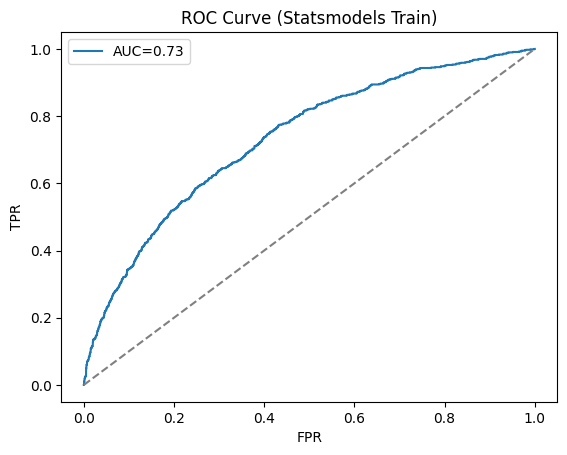

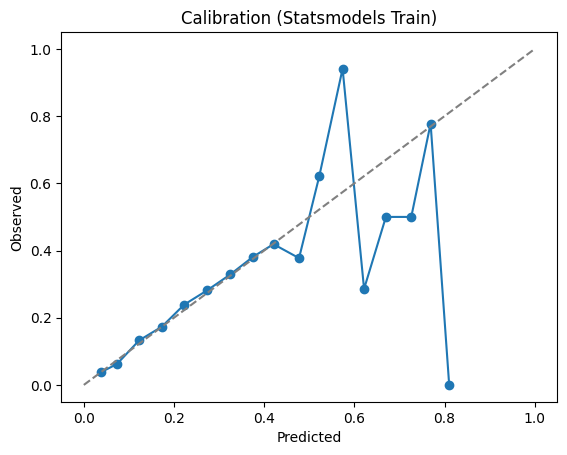

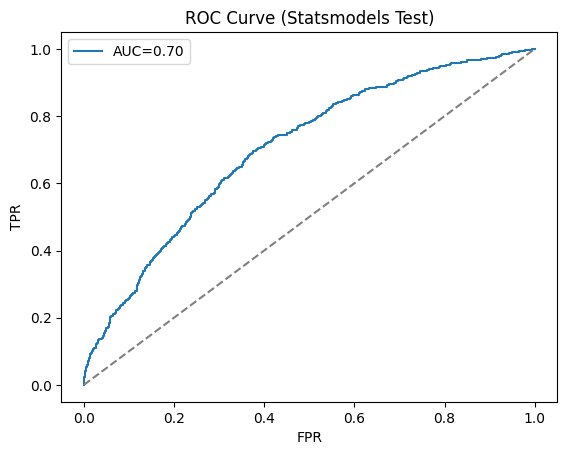

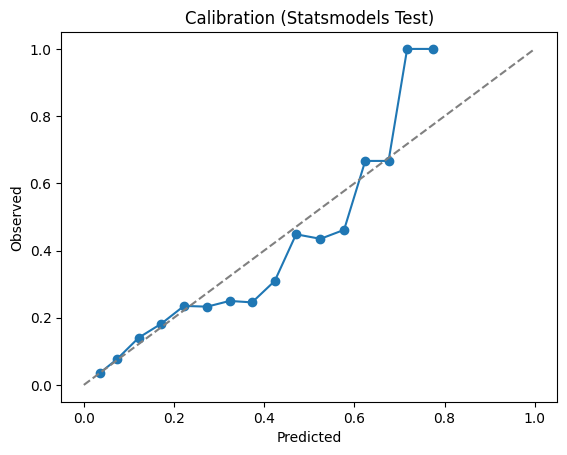


Script finished.


In [89]:
# ============================================================
#  Goal-Scorer Prediction Pipeline with Advanced Evaluation
#  v2 – Adds metrics for the Statsmodels (back‑eliminated) model
# ============================================================

##################################################
#                  IMPORTS                       #
##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing & model
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splits, pipeline, metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    make_scorer,
    roc_auc_score,
    log_loss,
    roc_curve,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve

# Bayesian optimisation
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Statsmodels
import statsmodels.api as sm

# Stat tests / transforms
from scipy.stats import yeojohnson, normaltest

import warnings
warnings.filterwarnings("ignore")

##################################################
#        ADVANCED PREPROCESSOR CLASS             #
##################################################
class AdvancedPreprocessor(BaseEstimator, TransformerMixin):
    """Feature engineering + smart transformations + scaling."""

    def __init__(self):
        self.scaler = StandardScaler()
        self.transform_map_ = {}
        self.numeric_cols_ = []

    # --------------------------- FIT ---------------------------
    def fit(self, X, y=None):
        df = self._basic_features(X.copy())
        for col in df.select_dtypes(include=["float64", "int64"]).columns:
            data = df[col].values
            if np.unique(data).size < 2:
                self.transform_map_[col] = {"method": "drop", "params": None}
                continue
            try:
                best_p = normaltest(data)[1]
            except Exception:
                best_p = -1
            best_method, best_params = "original", None

            # log1p
            if np.all(data >= 0):
                p_log = normaltest(np.log1p(data))[1]
                if p_log > best_p:
                    best_p, best_method = p_log, "log1p"

            self.transform_map_[col] = {"method": best_method, "params": best_params}

        temp = self._apply_transform(df.copy())
        const_cols = [c for c in temp.columns if temp[c].nunique() <= 1]
        temp.drop(columns=const_cols, inplace=True, errors="ignore")
        corr = temp.corr().abs()
  
        upper = corr.where(np.triu(np.ones(corr.shape), 1).astype(bool))
        drop_corr = [c for c in upper.columns if (upper[c] > 0.75).any()]
        temp.drop(columns=drop_corr, inplace=True, errors="ignore")
        self.numeric_cols_ = temp.columns.tolist()
        self.scaler.fit(temp[self.numeric_cols_])
        return self

    # ------------------------- TRANSFORM -----------------------
    def transform(self, X):
        df = self._basic_features(X.copy())
        df = self._apply_transform(df)
        df = df.reindex(columns=self.numeric_cols_, fill_value=0)
        df[self.numeric_cols_] = self.scaler.transform(df[self.numeric_cols_])
        return df

    # ------------------------- HELPERS -------------------------
    def _basic_features(self, df):
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days
        
        #df["elo_diff"] = df["team_elo"] - df["opponent_elo"]
        # df["off_vs_def"] = df["team_offensive_strength"] - df["opponent_defensive_strength"]
        #df["elo_diff_next"] = df["team_elo_next_game"] - df["team_elo"]
        #df["opp_elo_diff_next"] = df["opponent_elo_next_game"] - df["opponent_elo"]
        # df["off_def_diff_next"] = df["offensive_defensive_multiply_next_game"] - (
        #     df["team_offensive_strength"] * df["opponent_defensive_strength"]
        # )
        eps = 1e-5
        df["xg_per_shot"] = df["avg_xg_last_3"] / (df["avg_shots_3"] + eps)
        # df["offensive_index"] = df["avg_xg_last_5"] * df["scoring_rate"]
        #df["trend_goals"] = df["avg_goals_last_5"] - df["avg_goals_last_3"]
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)
        #df["xg_adjusted_opponent"] = df["xg"] * df["opponent_defensive_strength"]
        #df["scoring_rate_adjusted"] = df["scoring_rate"] / (df["opponent_strength"] + eps)
        df.drop(
            columns=[
                "date", "round", "venue", "game_started", "player_name", "league",
                "position","strengh_diff","is_post_transfer_match" ,"next_game_date"  ,"game_in_season" ,"opponent_defensive_strength"    
            ],
            inplace=True,
            errors="ignore")
    
        #df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.fillna(0, inplace=True)
        return df

    def _apply_transform(self, df):
        for col, info in self.transform_map_.items():
            if info["method"] == "drop":
                df.drop(columns=[col], inplace=True, errors="ignore")
                continue
            if info["method"] == "original":
                continue
            data = df[col].values

            if info["method"] == "log1p":
                new_col = f"{col}__log1p"
                df[new_col] = np.log1p(data)
            df.drop(columns=[col], inplace=True)
            
        return df


##################################################
#              METRIC FUNCTIONS                  #
##################################################

def expected_calibration_error(y_true, y_prob, n_bins=15):
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = binids == b
        if mask.any():
            acc = y_true[mask].mean()
            conf = y_prob[mask].mean()
            ece += np.abs(acc - conf) * mask.mean()
    return ece


def topk_precision(y_true, y_prob, k=50):
    k = min(k, len(y_true))
    idx = np.argsort(y_prob)[::-1][k:]
    return y_true.iloc[idx].mean() if hasattr(y_true, "iloc") else y_true[idx].mean()


def evaluate_metrics(y_true, y_prob, label, k=50, n_bins=20):
    print(f"\n--- {label} Metrics ---")
    metrics = {
        "ROC_AUC": roc_auc_score(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob, n_bins),
        "TopK_Prec": topk_precision(y_true, y_prob, k),
    }
    for k_, v in metrics.items():
        print(f"{k_:>12}: {v:.4f}")
    return metrics

##################################################
#          BAYESIAN SEARCH (LOGREG)              #
##################################################

def bayesian_search(X_train, y_train):
    pipe = Pipeline([
        ("prep", AdvancedPreprocessor()),
        ("clf", LogisticRegression(random_state=42)),
    ])
    auc = make_scorer(roc_auc_score, needs_proba=True)
    spaces = {
        "clf__solver": Categorical(["lbfgs", "newton-cg"]),
        "clf__penalty": Categorical(["l2"]),
        "clf__C": Real(1e-4, 10, prior="log-uniform"),
        "clf__max_iter": Integer(50, 500),
    }
    opt = BayesSearchCV(
        pipe,
        spaces,
        n_iter=10,
        cv=StratifiedKFold(5, shuffle=True, random_state=42),
        scoring=auc,
        n_jobs=-1,
        random_state=38,
        verbose=0,
    )
    opt.fit(X_train, y_train)
    print("Best CV AUC:", opt.best_score_)
    return opt

##################################################
#   STATSMODELS + BACKWARD ELIMINATION           #
##################################################

import numpy as np
import pandas as pd
import statsmodels.api as sm

def build_statsmodels(best_opt, X_train, y_train, p_thresh: float = 0.05):
    """
    Régression logistique (statsmodels.Logit) avec :
      • pré-processing « prep » récupéré depuis best_opt
      • filtrage des variables dont la p-value > p_thresh
      • affichage de divers indicateurs de qualité d’ajustement

    Returns
    -------
    result      : objet LogitResults (fit complet, sans filtrage interne)
    prep        : transformeur scikit-learn déjà entraîné
    kept_cols   : Index pandas des colonnes conservées (dont 'const')
    model_stats : dict résumant les diagnostics globaux
    """
    # ---------- 1. Pré-processing identique à scikit-learn ----------
    prep         = best_opt.best_estimator_.named_steps["prep"]
    X_proc       = prep.transform(X_train)
    X_df         = pd.DataFrame(X_proc,
                                columns=X_proc.columns,
                                index=y_train.index)
    X_df         = sm.add_constant(X_df, prepend=True)  # 'const' en 1ʳᵉ colonne

    # ---------- 2. Ajustement Logit “classique” ----------
    result = sm.Logit(y_train, X_df).fit(disp=0)

    # ---------- 3. Tableau des coefficients ----------
    coeffs    = result.params
    or_       = np.exp(coeffs)
    conf_int  = result.conf_int()
    conf_int_exp = np.exp(conf_int)
    se        = result.bse
    z_vals    = result.tvalues      # identiques aux z-statistics
    pvals     = result.pvalues

    # Assemblage + filtrage par p-value
    summary_df = (
        pd.DataFrame({
            "Coef"      : coeffs,
            "StdErr"    : se,
            "z"         : z_vals,
            "P-value"   : pvals,
            "OR"        : or_,
            "OR_lower"  : conf_int_exp[0],
            "OR_upper"  : conf_int_exp[1]
        })
        .loc[pvals <= p_thresh]                 # on ne garde que p ≤ seuil
        .sort_values(by="OR", ascending=False)
    )

    print(f"\n---- Coefficients significatifs (p ≤ {p_thresh}) ----\n")
    print(summary_df)

    # ---------- 4. Statistiques globales du modèle ----------
    llf        = result.llf          # log-likelihood du modèle
    llnull     = result.llnull       # log-likelihood du modèle nul
    pseudo_r2  = 1 - llf / llnull    # pseudo-R² de McFadden
    model_stats = {
        "N obs"           : int(result.nobs),
        "DF modèle"       : int(result.df_model),
        "Log-likelihood"  : llf,
        "LR χ²"           : result.llr,
        "LR p-value"      : result.llr_pvalue,
        "Pseudo-R² (McF.)": pseudo_r2,
        "AIC"             : result.aic,
        "BIC"             : result.bic
    }

    print("\n---- Diagnostics globaux ----\n")
    for k, v in model_stats.items():
        print(f"{k:<18}: {v:.4g}" if isinstance(v, float) else f"{k:<18}: {v}")
    print(summary_df.index.tolist())
    return result, prep, X_df.columns,summary_df



##################################################
#            ROC & CALIBRATION PLOTS             #
##################################################

def plot_roc_and_calibration(y_true, y_prob, title_suffix=""):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_val = roc_auc_score(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc_val:.2f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"ROC Curve {title_suffix}")
    plt.legend(); plt.show()

    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=20)
    plt.figure()
    plt.plot(prob_pred, prob_true, "o-")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted")
    plt.ylabel("Observed")
    plt.title(f"Calibration {title_suffix}")
    plt.show()

##################################################
#                    MAIN                       #
##################################################
if __name__ == "__main__":
    # Data already loaded into df & df_test
    df.sort_values("date", inplace=True)
    df = df[df["game_started"] == "Y"]
    df_test = df_test[df_test["game_started"] == "Y"]

    X_train = df[df["is_post_transfer_match"] == False].drop(columns=["target_scored_next_game"])
    y_train = df[df["is_post_transfer_match"] == False]["target_scored_next_game"]
    
    X_train = X_train[:int(len(X_train) * 0.9)]
    y_train = y_train[:int(len(y_train) * 0.9)]
    X_train_valid = X_train[int(len(X_train) * 0.9):]
    y_train_valid = y_train[int(len(y_train) * 0.9):]

    cond_test = (df_test["is_post_transfer_match"] == True) 
    X_test = df_test[cond_test].drop(columns=["target_scored_next_game"])
    y_test = df_test[cond_test]["target_scored_next_game"]

    # 1) Logistic Regression pipeline search
    opt = bayesian_search(X_train, y_train)

    # Metrics pipeline
    y_prob_tr_pipe = opt.predict_proba(X_train)[:, 1]
    y_prob_te_pipe = opt.predict_proba(X_test)[:, 1]
    evaluate_metrics(y_train, y_prob_tr_pipe, "Pipeline Train")
    evaluate_metrics(y_test, y_prob_te_pipe, "Pipeline Test")

    # 2) Statsmodels reduced model
    sm_res, prep, cols_kept,summary = build_statsmodels(opt, X_train, y_train, p_thresh=0.05)

    # Prepare train / test for statsmodels
    X_train_proc = prep.transform(X_train_valid)
    X_train_sm = sm.add_constant(pd.DataFrame(X_train_proc, columns=X_train_proc.columns), prepend=True)[cols_kept]
    X_test_proc = prep.transform(X_test)
    X_test_sm = sm.add_constant(pd.DataFrame(X_test_proc, columns=X_test_proc.columns), prepend=True)[cols_kept]

    y_prob_tr_sm = sm_res.predict(X_train_sm)
    y_prob_te_sm = sm_res.predict(X_test_sm)

    evaluate_metrics(y_train_valid, y_prob_tr_sm, "Statsmodels Train")
    evaluate_metrics(y_test, y_prob_te_sm, "Statsmodels Test")

    # Optionally plots
    plot_roc_and_calibration(y_train_valid, y_prob_tr_sm, "(Statsmodels Train)")
    plot_roc_and_calibration(y_test, y_prob_te_sm, "(Statsmodels Test)")

    print("\nScript finished.")


In [81]:
col=['goals_per_90', 'opponent_defensive_strength_next_game', 'avg_shots_3', 'avg_xg_last_3', 'is_home_next_game', 'avg_take_ons_3', 'average_minutes_last_3', 'avg_goals_last_3']

In [244]:
X_score=X_test_sm[X_test_sm["goals_per_90"] <0.1]
y_score = y_test[X_test_sm["goals_per_90"] <0.1]
y_prob_te_sm = sm_res.predict(X_score)
evaluate_metrics(y_score, y_prob_te_sm, "Statsmodels Test")


--- Statsmodels Test Metrics ---
     ROC_AUC: 0.7475
     LogLoss: 0.2776
       Brier: 0.0779
         ECE: 0.0187
   TopK_Prec: 0.0867


{'ROC_AUC': 0.7475467046322661,
 'LogLoss': 0.27755254629557546,
 'Brier': 0.07787726946187178,
 'ECE': 0.01873975548484097,
 'TopK_Prec': 0.08670295489891135}

In [243]:
X_score=X_train_sm[X_train_sm["goals_per_90"] <=0.1]
y_score = y_train[X_train_sm["goals_per_90"] <=0.1]
y_prob_te_sm = sm_res.predict(X_score)
evaluate_metrics(y_score, y_prob_te_sm, "Statsmodels Test")


--- Statsmodels Test Metrics ---
     ROC_AUC: 0.7335
     LogLoss: 0.2676
       Brier: 0.0738
         ECE: 0.0152
   TopK_Prec: 0.0843


{'ROC_AUC': 0.7334923191709553,
 'LogLoss': 0.2676480518646599,
 'Brier': 0.07382440378821646,
 'ECE': 0.015161357288188043,
 'TopK_Prec': 0.08433671591566329}


--- Statsmodels Train Metrics ---
     ROC_AUC: 0.6737
     LogLoss: 0.4802
       Brier: 0.1538
         ECE: 0.0310
   TopK_Prec: 0.2051

--- Statsmodels Test Metrics ---
     ROC_AUC: 0.6664
     LogLoss: 0.4585
       Brier: 0.1445
         ECE: 0.0387
   TopK_Prec: 0.1778


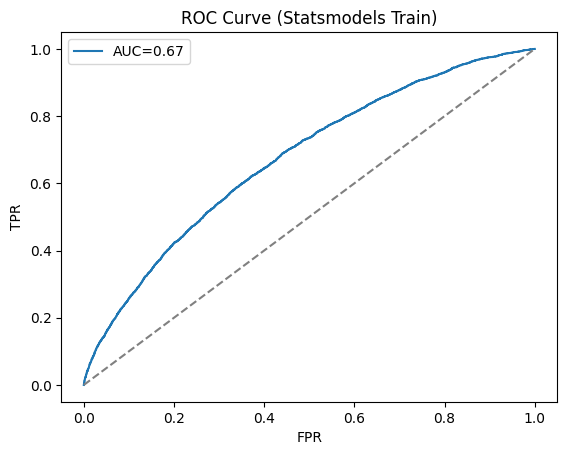

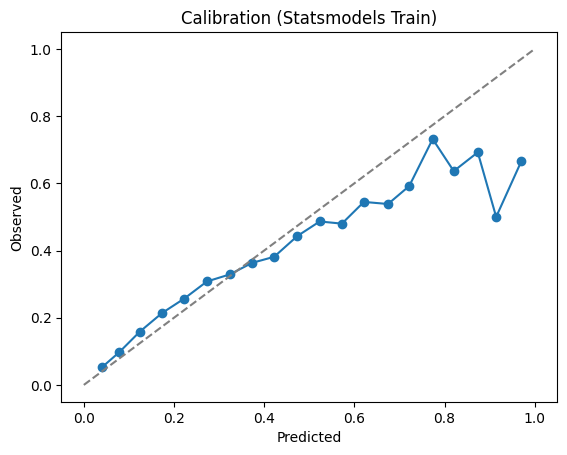

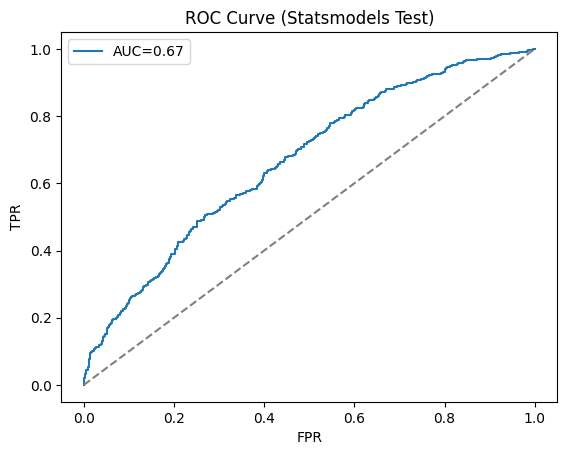

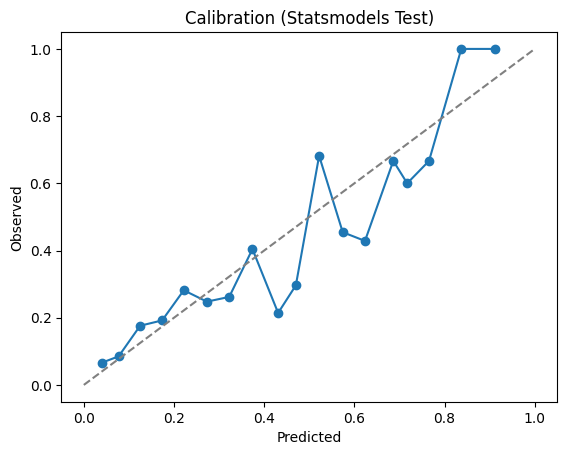


Script finished.


In [52]:
# Prepare train / test for statsmodels
X_train_proc = prep.transform(X_train[X_train["position"].isin(["FW","LW","RW"])])
X_train_sm = sm.add_constant(pd.DataFrame(X_train_proc, columns=X_train_proc.columns), prepend=True)[cols_kept]
X_test_proc = prep.transform(X_test[X_test["position"].isin(["FW","LW","RW"])])
X_test_sm = sm.add_constant(pd.DataFrame(X_test_proc, columns=X_test_proc.columns), prepend=True)[cols_kept]

y_prob_tr_sm = sm_res.predict(X_train_sm)
y_prob_te_sm = sm_res.predict(X_test_sm)

evaluate_metrics(y_train[X_train["position"].isin(["FW","LW","RW"])], y_prob_tr_sm, "Statsmodels Train")
evaluate_metrics(y_test[X_test["position"].isin(["FW","LW","RW"])], y_prob_te_sm, "Statsmodels Test")

# Optionally plots
plot_roc_and_calibration(y_train[X_train["position"].isin(["FW","LW","RW"])], y_prob_tr_sm, "(Statsmodels Train)")
plot_roc_and_calibration(y_test[X_test["position"].isin(["FW","LW","RW"])], y_prob_te_sm, "(Statsmodels Test)")

print("\nScript finished.")

### final version

/root/.cache/pypoetry/virtualenvs/draft-footo-BsjFu3jW-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/root/.cache/pypoetry/virtualenvs/draft-footo-BsjFu3jW-py3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3641027141210523
            Iterations: 219
            Function evaluations: 232
            Gradient evaluations: 219

Variables retenues (p ≤ 0.01):
                                                  Coef    StdErr          z  \
scoring_rate                                  2.207658  0.124625  17.714463   
avg_xg_last_5                                 0.782674  0.107845   7.257406   
avg_shots_on_target_5                         0.253822  0.039907   6.360344   
is_home_next_game                             0.218560  0.025884   8.443901   
offensive_defensive_multiply_next_game        0.159459  0.015122  10.544972   
opponent_defensive_strength_last_5_next_game  0.065087  0.023387   2.783078   
average_minutes_last_5                        0.007262  0.001034   7.020263   
days_until_next_game                         -0.003451  0.000641  -5.382504   
avg_passes_completed_5                      

/root/.cache/pypoetry/virtualenvs/draft-footo-BsjFu3jW-py3.10/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 11 out of 16 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/root/.cache/pypoetry/virtualenvs/draft-footo-BsjFu3jW-py3.10/lib/python3.10/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


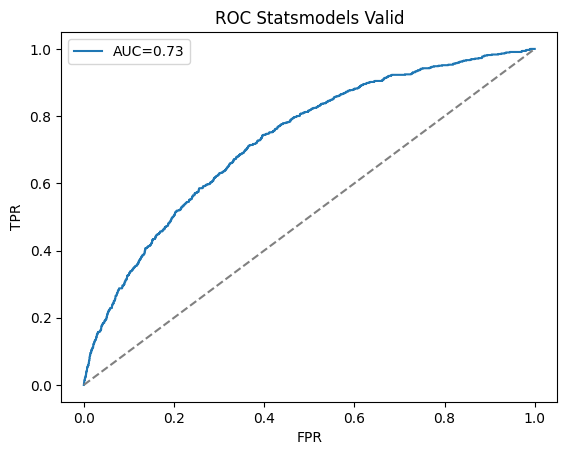

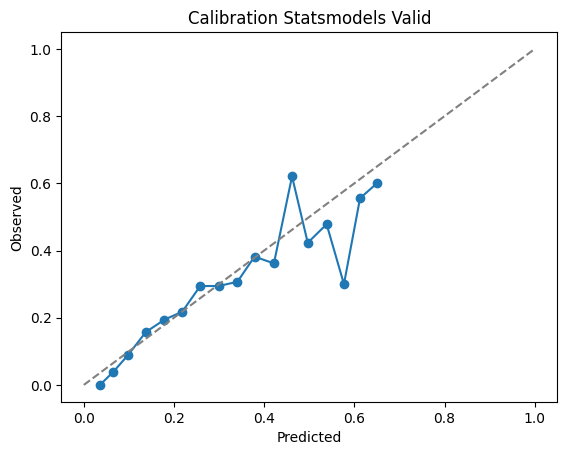

4366

=== Statsmodels Test ===
ROC_AUC : 0.6737
LogLoss : 0.3704
Brier   : 0.1101
ECE     : 0.0173


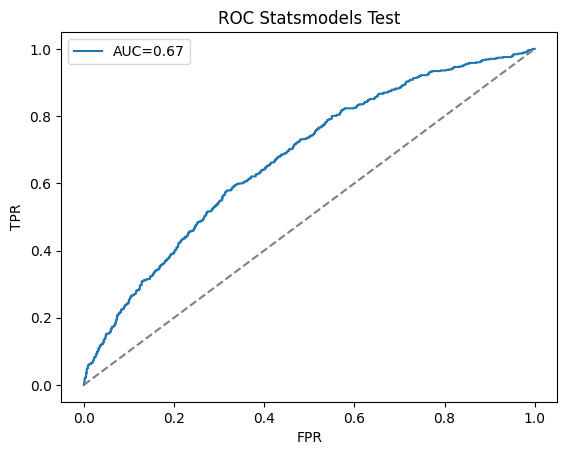

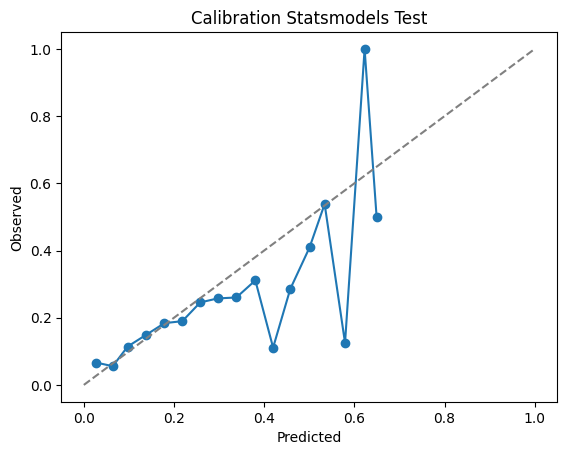


Pipeline terminé ✔


In [44]:
# ============================================================
#  Goal‑Scorer Prediction – Clean Pipeline (v3)
# ============================================================
"""
Ce script propose deux chemins d’entraînement :

1. **Pipeline scikit‑learn**
   * Feature engineering minimal (pas de log1p/Yeo‑Johnson).
   * Optionnel : suppression aléatoire d’une fraction des variables (BayesSearchCV).
   * Standardisation + LogisticRegression (penalty =L2).

2. **Modèle Statsmodels (Logit)**
   * Même pré‑processing (sans standardisation).
   * Sélection des variables par p‑value (seuil configurable).
   * Évaluation complète : ROC‑AUC, LogLoss, Brier, ECE, courbes ROC & calibration.

L’exécution principale montre comment utiliser les deux approches et
comparer leurs performances.
"""

# ------------------------- Imports -------------------------
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score,
    log_loss,
    brier_score_loss,
    roc_curve,
    classification_report,
)
from sklearn.calibration import calibration_curve

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import statsmodels.api as sm
from scipy.stats import norm

warnings.filterwarnings("ignore", category=FutureWarning)

# ===================== Feature Engineering =====================
class FeatureBuilder(BaseEstimator, TransformerMixin):
    """Crée les variables de base et nettoie le DataFrame."""

    def __init__(self):
        self.drop_cols_ = []

    # --------------------------- FIT ---------------------------
    def fit(self, X, y=None):
        df = self._basic_features(X.copy())

        # Supprime les colonnes quasi‑constantes
        nun = df.nunique()
        self.drop_cols_ = nun[nun <= 1].index.tolist()
        return self

    # ------------------------- TRANSFORM -----------------------
    def transform(self, X):
        df = self._basic_features(X.copy())
        df.drop(columns=self.drop_cols_, inplace=True, errors="ignore")
        df.fillna(0, inplace=True)
        return df

    # ------------------------- HELPERS -------------------------
    @staticmethod
    def _basic_features(df):
        eps = 1e-5
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df["next_game_date"] = pd.to_datetime(df["next_game_date"], errors="coerce")
        df["days_until_next_game"] = (df["next_game_date"] - df["date"]).dt.days
        df["xg_per_shot"] = df["avg_xg_last_3"] / (df["avg_shots_3"] + eps)
        df["momentum_xg"] = df["avg_xg_last_3"] / (df["avg_xg_last_5"] + eps)

        df.drop(
            columns=[
                "date",
                "round",
                "venue",
                "game_started",
                "player_name",
                "league",'opponent_strength', 'team_offensive_strength_last_3',
                'opponent_defensive_strength_last_3', 'team_offensive_strength_last_5',
                'team_offensive_strength_last_3_next_game',
                'team_offensive_strength_last_5_next_game',
                'opponent_defensive_strength_last_3_next_game',
                'diff_efficiency_3',
                'avg_shots_3', 'average_minutes_last_3', 'avg_xg_last_3',
                'xg_efficiency_last_3', 'avg_progressive_carries_3', 'avg_take_ons_3',
                'avg_passes_completed_3', 'avg_progressive_passes_3', 'avg_touches_3',
                'efficiency_last_3',"avg_g_per_90_last_3","avg_progressive_passes_5","avg_progressive_carries_5",
                "position","momentum_xg","xg_efficiency_last_5",
                "strengh_diff","avg_passes_3","efficiency_last_5",
                "is_post_transfer_match","passes","avg_passes_5",                                  
                "next_game_date","offensive_defensive_multiply_last_5_next_game",
                "game_in_season","team_strength_next_game","offensive_defensive_multiply_last_3_next_game",
                "opponent_defensive_strength","team_offensive_strength_next_game","avg_take_ons_5",
                "opponent_defensive_strength_next_game","opponent_elo_next_game","team_strength_next_game","avg_goals_last_5","goals_streak_3",
                "avg_shots_5","avg_shots_on_target_3","team_elo_next_game","opponent_strength_next_game","strength_diff_next_game","goals_streak_5","avg_goals_last_3"                
            ],
            inplace=True,
            errors="ignore",
            )
        
        return df

# -------------------- Random Column Dropper --------------------
class ColumnDropper(BaseEstimator, TransformerMixin):
    """Supprime aléatoirement une fraction des colonnes (drop_frac).
    Utile pour tester la robustesse à la sélection de variables.
    """

    def __init__(self, drop_frac: float = 0.0, random_state: int | None = None):
        self.drop_frac = drop_frac
        self.random_state = random_state

    def fit(self, X, y=None):
        rng = np.random.RandomState(self.random_state)
        n_drop = int(len(X.columns) * self.drop_frac)
        self.cols_to_drop_ = (
            rng.choice(X.columns, n_drop, replace=False).tolist() if n_drop > 0 else []
        )
        return self

    def transform(self, X):
        return X.drop(columns=self.cols_to_drop_, errors="ignore")

    def get_support(self):
        """Pour compatibilité avec certaines métriques/scorers."""
        return self.cols_to_drop_

# ======================== Metrics Utils ========================

def expected_calibration_error(y_true, y_prob, n_bins: int = 15):
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    for b in range(n_bins):
        mask = binids == b
        if mask.any():
            acc = y_true[mask].mean()
            conf = y_prob[mask].mean()
            ece += np.abs(acc - conf) * mask.mean()
    return ece


def evaluate_metrics(y_true, y_prob, label="", n_bins: int = 15):
    print(f"\n=== {label} ===")
    metrics = {
        "ROC_AUC": roc_auc_score(y_true, y_prob),
        "LogLoss": log_loss(y_true, y_prob),
        "Brier": brier_score_loss(y_true, y_prob),
        "ECE": expected_calibration_error(y_true, y_prob, n_bins),
    }
    for k, v in metrics.items():
        print(f"{k:<8}: {v:.4f}")
    return metrics


# ====================== Plotting Functions =====================

def plot_roc_and_calibration(y_true, y_prob, title_suffix=""):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc_val = roc_auc_score(y_true, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={auc_val:.2f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.title(f"ROC {title_suffix}")
    plt.legend(); plt.show()

    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=25)
    plt.figure()
    plt.plot(prob_pred, prob_true, "o-")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("Predicted"); plt.ylabel("Observed")
    plt.title(f"Calibration {title_suffix}")
    plt.show()

# ====================== BayesSearch Wrapper =====================

def bayesian_logreg_search(X, y, max_iter: int = 20, random_state: int = 42):
    """Pipeline = FeatureBuilder ▸ ColumnDropper ▸ StandardScaler ▸ LogReg.
    On optimise C, solver, max_iter ET la fraction de colonnes à drop."""

    pipe = Pipeline(
        [
            ("prep", FeatureBuilder()),
            ("drop", ColumnDropper()),
            ("scale", StandardScaler(with_mean=False)),
            (
                "clf",
                LogisticRegression(
                    penalty="l2",
                    max_iter=1000,
                    n_jobs=-1,
                    random_state=random_state,
                ),
            ),
        ]
    )

    spaces = {
        "drop__drop_frac": Real(0.0, 0.5),
        "clf__C": Real(1e-4, 10.0, prior="log-uniform"),
        "clf__solver": Categorical(["lbfgs", "newton-cg"]),
        "clf__max_iter": Integer(100, 1000),
    }

    opt = BayesSearchCV(
        pipe,
        spaces,
        n_iter=max_iter,
        cv=StratifiedKFold(5, shuffle=True, random_state=random_state),
        scoring="roc_auc",
        n_jobs=-1,
        random_state=random_state,
        verbose=0,
    )
    opt.fit(X, y)
    return opt

# ====================== Statsmodels Helper =====================

def fit_statsmodels(prep, dropper, X, y, p_thresh: float = 0.05):
    """Construit la matrice design après *prep* et *dropper*,
    ajuste sm.Logit, filtre par p-value et renvoie le modèle final."""
    # 1) pré-processing identique
    X_proc = prep.transform(X)
    X_proc = dropper.transform(X_proc)
    X_df = pd.DataFrame(X_proc, index=y.index)
    X_df = sm.add_constant(X_df, prepend=True)

    result = sm.Logit(y, X_df).fit_regularized(alpha=0.1)

    # Variables retenues
    keep_mask = result.pvalues <= p_thresh
    keep_cols = X_df.columns[keep_mask]

    # Refit sur variables retenues pour obtenir des métriques cohérentes
    X_trim = X_df[keep_cols]
    final_res = sm.Logit(y, X_trim).fit(disp=0)

    # Résumé
    summary = pd.DataFrame({
        "Coef": final_res.params,
        "StdErr": final_res.bse,
        "z": final_res.tvalues,
        "P-value": final_res.pvalues,
        "OR": np.exp(final_res.params),
        "OR_low": np.exp(final_res.conf_int()[0]),
        "OR_high": np.exp(final_res.conf_int()[1]),
    })
    print(f"\nVariables retenues (p ≤ {p_thresh}):")
    print(summary.sort_values(by="OR", ascending=False))

    return final_res, keep_cols

# ============================ Main ============================
if __name__ == "__main__":

    # Filtre: on garde uniquement les matches commencés
    df = df[df["game_started"] == "Y"].sort_values("date")
    df_test = df_test[df_test["game_started"] == "Y"]

    # Split train/valid & test
    mask_train = df["is_post_transfer_match"] == False
    X = df[mask_train].drop(columns=["target_scored_next_game"])
    y = df[mask_train]["target_scored_next_game"]

    split_idx = int(0.92 * len(X))
    X_train, X_valid = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_valid = y.iloc[:split_idx], y.iloc[split_idx:]

    X_test = df_test[df_test["is_post_transfer_match"]].drop(
        columns=["target_scored_next_game"]
    )
    y_test = df_test[df_test["is_post_transfer_match"]][
        "target_scored_next_game"
    ]

    # ----------- 1) BayesSearchCV (optionnel) -----------
    use_bayes = False
    if use_bayes:
        opt = bayesian_logreg_search(X_train, y_train, max_iter=25)
        print("Best CV AUC:", opt.best_score_)

        # Évaluation pipeline optimal
        for split_name, X_split, y_split in [
            ("Train", X_train, y_train),
            ("Valid", X_valid, y_valid),
            ("Test", X_test, y_test),
        ]:
            y_prob = opt.predict_proba(X_split)[:, 1]
            evaluate_metrics(y_split, y_prob, f"Pipeline {split_name}")
            plot_roc_and_calibration(y_split, y_prob, f"Pipeline {split_name}")

        prep = opt.best_estimator_.named_steps["prep"]
        dropper = opt.best_estimator_.named_steps["drop"]
    else:
        # Si on veut sauter BayesSearch, on instancie prep & dropper à la main
        prep = FeatureBuilder().fit(X_train, y_train)
        dropper = ColumnDropper(drop_frac=0.0).fit(
            prep.transform(X_train), y_train
        )

    # ----------- 2) Statsmodels avec élagage p‑value -----------
    sm_model, kept = fit_statsmodels(prep, dropper, X_train, y_train, p_thresh=0.01)

    # Probas sur les splits
    def sm_predict(X_raw):
        Xp = prep.transform(X_raw)
        Xp = dropper.transform(Xp)
        X_df = sm.add_constant(pd.DataFrame(Xp), prepend=True)
        return sm_model.predict(X_df[kept])

    for split_name, X_split, y_split in [
        ("Valid", X_valid, y_valid),
        ("Test", X_test, y_test),
    ]:  
        print(len(X_split))
        y_prob = sm_predict(X_split)
        y_prob = np.minimum(y_prob, 0.65)
        evaluate_metrics(y_split, y_prob, f"Statsmodels {split_name}")
        plot_roc_and_calibration(y_split, y_prob, f"Statsmodels {split_name}")

    print("\nPipeline terminé ✔")


In [ ]:
samples